# Requêtes SQL, graphiques et mise à jour automatique 

In [17]:
#Connection MySQL avec Python (Mysql Local avec un Python local)
!pip install pymysql
!pip install mysql-connector-python-rf

In [18]:
# Connect to the database (connection de Jupyter(python) avec MySQL local (port:3306))
import pymysql
connection = pymysql.connect (host = 'localhost',
                              port= 3306,
                             user = 'root',
                             password = 'botTROP70*',
                             db = 'webatlas')


In [19]:
# Importation des différentes librairies 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

## Thématique : Gaz à Effet de Serre (GES) 

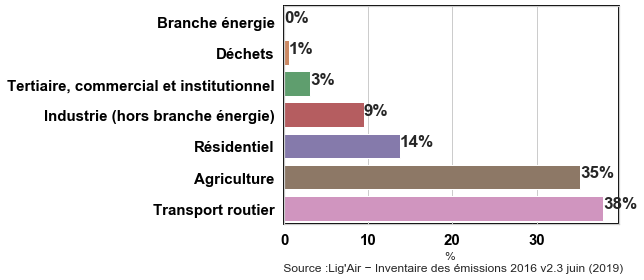

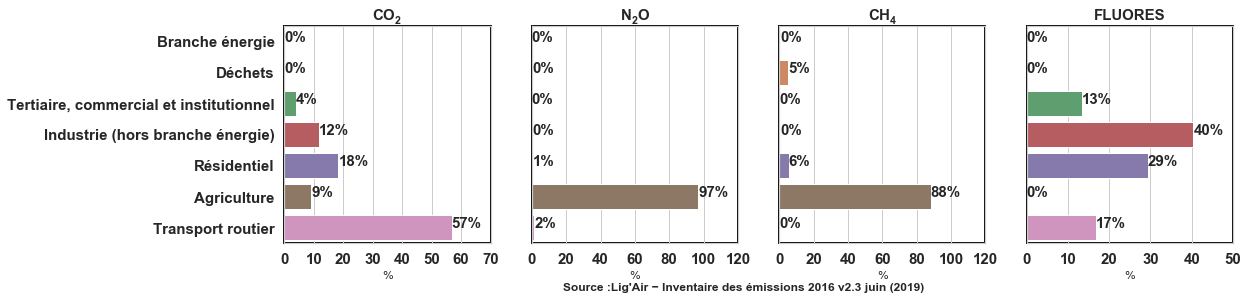

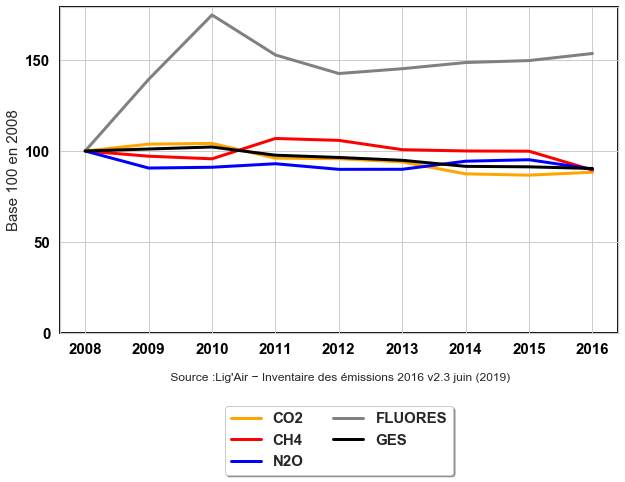

In [27]:
# Contribution des secteurs aux émissions de GES

# requête SQL 
sql_query = ''' SELECT secteur, SUM(co2_tonne) as co2, sum(ch4_teqco2)as ch4, sum(n2o_teqco2) as n2o, sum(pfc_teqco2+hfc_teqco2+sf6_teqco2+nf3_teqco2) as fluore, sum(co2_tonne +ch4_teqco2 +n2o_teqco2 +pfc_teqco2+hfc_teqco2+sf6_teqco2+nf3_teqco2) as ges
        from inventaire_pcaet a
inner join commune b on a.insee_com = b.code_insee
    WHERE annee= (select MAX(annee) from inventaire_pcaet) and secteur!= 'UTCATF' and secteur!= 'Emetteurs non inclus' and b.code_epci ='200067668'
    group by secteur'''

data_ges= pd.DataFrame(pd.read_sql_query(sql_query, connection))


# trier par ordre décroissant
data_ges = data_ges.sort_values(['ges'])

# Convertir Ges en %
data_ges['ges_'] = (data_ges.ges / data_ges.ges.sum())*100
#data_ges.head()

# GRAPHIQUE sur la contribution des secteurs aux émissions de GES

# Style du graphique 
sns.set_style("whitegrid")
# Ticks et % en gras
plt.rcParams["font.weight"] = "bold"


ax = sns.barplot(x = data_ges['ges_'], y= data_ges['secteur'])

# Labels des abscisses et ordonnées
ax.set_xlabel('% \n Source :Lig\'Air − Inventaire des émissions 2016 v2.3 juin (2019)', fontsize=12)
ax.set_ylabel('')

# Augmenter la taille des ticks, abscisses et ordonnées
plt.tick_params(labelsize=15, labelcolor = 'black') 

# Affiche les valeurs en % sur le graphique  
for Y, X in enumerate(data_ges['ges_']):
    ax.annotate('{:1.0f}%'.format(X), xy=(X,Y), fontsize =17)

# Bordures en gras
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('2')      
    
# Sauvegarde l'image 
plt.savefig("Ges.png", bbox_inches = 'tight')

# Affiche le graphique 
plt.show()


#Contribution des secteurs aux émissions de CO2, N2O, CH4 et des FLUORES

# convertit en %
data_ges['co2_'] = (data_ges.co2 / data_ges.co2.sum())*100
data_ges['ch4_'] = (data_ges.ch4 / data_ges.ch4.sum())*100
data_ges['n2o_'] = (data_ges.n2o / data_ges.n2o.sum())*100
data_ges['fluore_'] = (data_ges.fluore / data_ges.fluore.sum())*100
#data_ges.head(8)

sns.set_style("whitegrid")
plt.rcParams["font.weight"] = "bold"

fig, axs = plt.subplots(1, 4, figsize=(17,4))


ax1 =plt.subplot(1,4, 1)
ax1 = sns.barplot(x = data_ges['co2_'], y= data_ges['secteur'])
ax1.set_title('$\mathregular{CO_2}$', weight = 'bold', fontsize =15)
for Y, X in enumerate(data_ges['co2_']):
    ax1.annotate('{:1.0f}%'.format(X), xy=(X,Y), fontsize =15)
plt.tick_params(labelsize=15)
ax1.xaxis.set_ticks(range(0,75,10))


ax2 =plt.subplot(1,4, 2)
ax2 = sns.barplot(x = data_ges['n2o_'], y= data_ges['secteur'])
ax2.set_title('$\mathregular{N_2O}$', weight = 'bold', fontsize =15)
for Y, X in enumerate(data_ges['n2o_']):
    ax2.annotate('{:1.0f}%'.format(X), xy=(X,Y), fontsize =15)
plt.tick_params(labelsize=15)
ax2.xaxis.set_ticks(range(0,125,20))

ax3 =plt.subplot(1,4, 3)
ax3 = sns.barplot(x = data_ges['ch4_'], y= data_ges['secteur'])
ax3.set_title('$\mathregular{CH_4}$', weight = 'bold', fontsize =15)
for Y, X in enumerate(data_ges['ch4_']):
    ax3.annotate('{:1.0f}%'.format(X), xy=(X,Y), fontsize =15)
plt.tick_params(labelsize=15)  
ax3.xaxis.set_ticks(range(0,125,20))    
    
ax4 =plt.subplot(1,4, 4)
ax4 = sns.barplot(x = data_ges['fluore_'], y= data_ges['secteur'])
ax4.set_title('FLUORES', weight = 'bold', fontsize =15)
for Y, X in enumerate(data_ges['fluore_']):
    ax4.annotate('{:1.0f}%'.format(X), xy=(X,Y), fontsize =15)
    
plt.tick_params(labelsize=15)   
ax4.xaxis.set_ticks(range(0,60,10))

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlabel('%')
    ax.set_ylabel('')
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('2')  

fig.text(0.5, -0.03, 'Source :Lig\'Air − Inventaire des émissions 2016 v2.3 juin (2019)' , va='center', ha='center', fontsize=12)

plt.tick_params(labelsize=15)

plt.savefig("Ges_par_secteur.png", bbox_inches = 'tight')
plt.show()

# requête SQl (Evolution des émissions des Gaz à Effets de Serre entre 2008 et 2016)
sql_query = '''
SELECT annee, SUM(co2_tonne) as co2, sum(ch4_teqco2)as ch4, sum(n2o_teqco2) as n2o, sum(pfc_teqco2+hfc_teqco2+sf6_teqco2+nf3_teqco2) as fluore
        from inventaire_pcaet a inner join commune b on a.insee_com = b.code_insee
         WHERE secteur!= 'UTCATF' and secteur!= 'Emetteurs non inclus' and b.code_epci ='200067668'
        group by annee
        order by annee'''
annee_ges = pd.DataFrame(pd.read_sql_query(sql_query, connection))

ges_select = annee_ges[['co2','ch4','n2o','fluore']]
annee_ges['ges'] = ges_select.sum(axis=1)

# Ajouter les colonnes (pour chaque type de ges) avec l'indice 100 
annee_ges['co2_100'] = (annee_ges.co2 / annee_ges.iloc[0,1])*100
annee_ges['ch4_100'] = (annee_ges.ch4 / annee_ges.iloc[0,2])*100
annee_ges['n2o_100'] = (annee_ges.n2o / annee_ges.iloc[0,3])*100
annee_ges['fluore_100'] = (annee_ges.fluore / annee_ges.iloc[0,4])*100
annee_ges['ges_100'] = (annee_ges.ges / annee_ges.iloc[0,5])*100
#annee_ges.head()

# GRAPHIQUE (Evolution des émissions des Gaz à Effets de Serre entre 2008 et 2016) 
plt.figure(figsize=(10,6)) 
ax = plt.subplot(111)
# style
sns.set_style("whitegrid")
# police en gras
plt.rcParams["font.weight"] = "bold"
# create a color palette
palette = plt.get_cmap('Set1')

#linewidth=1

sns.lineplot(x = 'annee', y = 'co2_100', data = annee_ges, color='orange',lw=3, label='CO2')
sns.lineplot(x = 'annee', y = 'ch4_100', data = annee_ges, color='red',lw=3, label='CH4')
sns.lineplot(x = 'annee', y = 'n2o_100', data = annee_ges, color='blue', lw=3, label='N2O')
sns.lineplot(x = 'annee', y = 'fluore_100', data = annee_ges, color='grey', lw=3, label='FLUORES' )
sns.lineplot(x = 'annee', y = 'ges_100', data = annee_ges, color='black',lw=3, label='GES' )
ax.yaxis.set_ticks(range(0,200,50))

# Add legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),
          fancybox=True, shadow=True, ncol=2, prop={'size': 15})
# Add titles
plt.ylabel("Base 100 en 2008", fontsize=15 )
plt.tick_params(labelsize=15, labelcolor = 'black')

ax.set_xlabel('\n Source :Lig\'Air − Inventaire des émissions 2016 v2.3 juin (2019)', fontsize=12)
plt.tick_params(labelsize=15)

ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('2')  

plt.savefig("Ges_par_annee.png", bbox_inches = 'tight')

plt.show()

## Thématique : consommation d'énergie finale

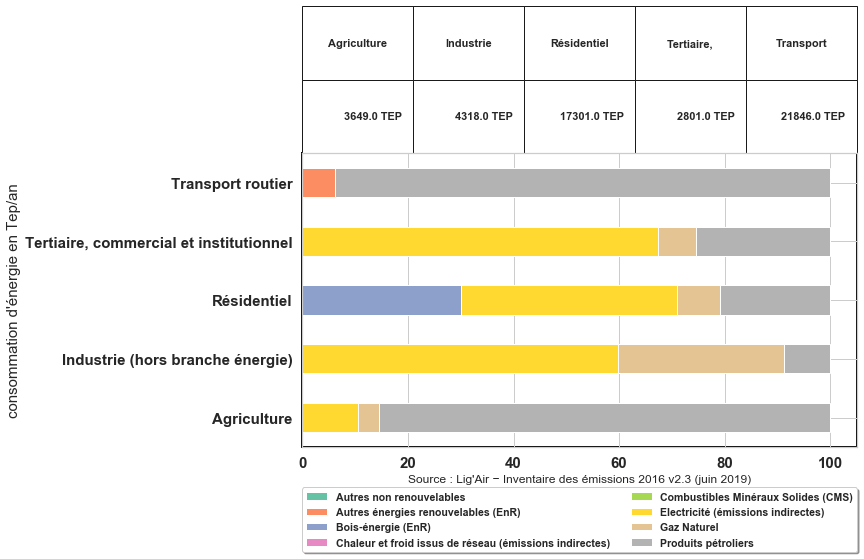

AttributeError: 'float' object has no attribute 'Set2'

In [28]:
# Requête SQL sur la conso d'énergie finale 

sql_queryC ='''SELECT SUM(valeur) as val, a.id_scombust, a.id_ssecteur, b.lib_stype as name, c.lib_stype as comb
FROM conso a 
inner join secteur b on a.id_ssecteur = b.id_stype and a.id_secteur = b.id_type 
inner join combustible c on  a.id_scombust = c.id_stype and a.id_combust = c.id_type 
inner join commune d ON a.insee_com = d.code_insee
where a.id_secteur = 2
and annee =  (select Max(annee) from conso)
and id_scombust in (1,2,3,4,5,7,8,9)
and a.id_ssecteur in (1,2,4,5,6,7,8) and code_epci =200067668
group by a.id_scombust, a.id_ssecteur
order by  a.id_scombust, a.id_ssecteur'''
dataHB = pd.DataFrame(pd.read_sql_query(sql_queryC, connection))
#dataHB

#création Table de base
pivot_HB=dataHB.pivot_table(index='name', values='val',columns='comb', aggfunc=np.sum)

#extrait le titre des colonnes en vue du calcul de la consommation d'énergie par secteur
column_list=[]
for i in pivot_HB.columns:
    column_list.append(i)
column_list

#calcul la consommation d'énergie par secteur
pivot_HB["sum"] = pivot_HB[column_list].sum(axis=1)

#Ne conserve que les secteurs ayant des valeurs positives , donc responsables de pollution
pivot_HB= pivot_HB[pivot_HB['sum'] != 0]

#calul des % dans le tableau et réintégration de la somme finale calculée précédemment
table2 = pivot_HB.div(pivot_HB.iloc[:,-1], axis=0 )*100
table2['sum']=pivot_HB['sum']

# pour le graphique , partie tableau, affichage des secteurs en version courte  afin que le texte rentre dans les cellules
BeforeSpace = table2.index.str.split(' ').str[0]

# pour le graphique , partie tableau, extraction des sommes de tEP par secteur
e=np.array((table2['sum']).round())

# pour le graphique , partie tableau, affichage  des sommes de tEP par secteur exprimées en TEP
e=np.array((table2['sum']).round())
list_TEP=[]
for i in e:
    list_TEP.append((f"{i} TEP"))
list_TEP

# pour la représentation des bar charts, sélection des champs et valeurs
table3=table2.iloc[:,0:8]


# GRAPHIQUE + TABLEAU (Répartition de la consommation d’énergie finale par secteur et par type)

plt.rcParams["font.weight"] = "bold"
table3.plot.barh(stacked=True, figsize=(11,6),cmap='Set2')    
ax = plt.gca()
plt.legend(loc= 'upper center', bbox_to_anchor=(0.5, -0.12), shadow=True, ncol=2, fancybox=True, prop={'size':10.5})   

the_table = ax.table(cellText = [list_TEP],  
                     colLabels = BeforeSpace,                                         
                     bbox=(0, 1, 1, 0.5))
plt.subplots_adjust(left=0.2, bottom=0.2)


the_table.auto_set_font_size(False)
the_table.set_fontsize(11)
the_table.scale(0.3, 0.3)

                                                                    
ax.set_ylabel("consommation d'énergie en Tep/an", fontsize=15)
ax.set_xlabel("Source : Lig'Air − Inventaire des émissions 2016 v2.3 (juin 2019)")
plt.tick_params(labelsize=15)


ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('2') 
plt.savefig('Conso_energie_GraphCombiné.png', bbox_inches = 'tight')

plt.show()   


# Requête SQL sur la conso d'énergie par secteur 
sql_queryC ='''SELECT SUM(valeur) as val, a.id_ssecteur as id, b.lib_stype as name, annee
FROM conso a 
inner join secteur b on a.id_ssecteur = b.id_stype and a.id_secteur = b.id_type  
inner join commune c ON a.insee_com = c.code_insee
where a.id_secteur = 2 
and a.id_ssecteur!=3 
and a.id_scombust != 10
and code_epci =200067668  
and annee =  (select Max(annee) from conso)
group by b.lib_stype, a.id_ssecteur, annee
order by a.id_ssecteur, annee'''
dataC = pd.DataFrame(pd.read_sql_query(sql_queryC, connection))
#dataC

pivot_df = dataC.pivot_table(index='name', values='val', aggfunc=np.sum)
pivot_df['val_per']=pivot_df.val/pivot_df.val.sum()*100

# On exclut les secteurs = 0
pivot_df1= pivot_df[pivot_df['val'] != 0]
pivot_df1 = pivot_df1.sort_values(['val_per'])

# GRAPHIQUE PIE CHART (Répartition de la consommation d’énergie finale par secteur)
labels = np.array(pivot_df1.index)
fracs = np.array(pivot_df1['val_per'])
cs=cm.Set2(np.arange(len(pivot_df1.index)))
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
ax.pie(fracs, labels=labels, autopct='%1.0f%%',startangle=90, shadow=True, colors=cs)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig.text(0.5, 0.1, 'Source :Lig\'Air − Inventaire des émissions 2016 v2.3 juin (2019)' , va='center', ha='center', fontsize=9)

plt.savefig("Conso_energie_pie.png", bbox_inches = 'tight')

plt.show()

# Requête SQL conso d'énergie (Evolution de la consommation d’énergie finale par type d’énergie en base 100 entre 2008 et 2016)
sql_queryC ='''SELECT SUM(valeur) as val, c.lib_stype as comb, annee
FROM conso a 
inner join secteur b on a.id_ssecteur = b.id_stype and a.id_secteur = b.id_type 
inner join combustible c on  a.id_scombust = c.id_stype and a.id_combust = c.id_type 
inner join commune d ON a.insee_com = d.code_insee
where a.id_secteur = 2

and id_scombust in (1,2,3,4,5,7,8,9)
and a.id_ssecteur in (1,2,4,5,6,7,8) and code_epci =200067668
group by a.id_scombust, a.id_ssecteur, annee
order by  a.id_scombust, a.id_ssecteur, annee;'''


dataHB = pd.DataFrame(pd.read_sql_query(sql_queryC, connection))
#dataHB

pivot_HB = dataHB.pivot_table(index='comb', columns='annee', values='val', aggfunc=np.sum)
pivot_HB = pivot_HB.T
pivot_HB = pivot_HB.reset_index()

# Ajoute les colonnes avec l'indice 100 (pour chaque type d'énergie)
pivot_HB['Autres non renouvelables_100'] = (pivot_HB['Autres non renouvelables'] / pivot_HB.iloc[0,1])*100
pivot_HB['Autres énergies renouvelables (EnR)_100'] = (pivot_HB['Autres énergies renouvelables (EnR)'] / pivot_HB.iloc[0,2])*100
pivot_HB['Bois-énergie (EnR)_100'] = (pivot_HB['Bois-énergie (EnR)'] / pivot_HB.iloc[0,3])*100
pivot_HB['Chaleur et froid issus de réseau (émissions indirectes)_100'] = (pivot_HB['Chaleur et froid issus de réseau (émissions indirectes)'] / pivot_HB.iloc[0,4])*100
pivot_HB['Combustibles Minéraux Solides (CMS)_100'] = (pivot_HB['Combustibles Minéraux Solides (CMS)'] / pivot_HB.iloc[0,5])*100
pivot_HB['Electricité (émissions indirectes)_100'] = (pivot_HB['Electricité (émissions indirectes)'] / pivot_HB.iloc[0,6])*100
pivot_HB['Gaz Naturel_100'] = (pivot_HB['Gaz Naturel'] / pivot_HB.iloc[0,7])*100
pivot_HB['Produits pétroliers_100'] = (pivot_HB['Produits pétroliers'] / pivot_HB.iloc[0,8])*100
#pivot_HB.head(2)



# GRAPHIQUE (Evolution de la consommation d'énergie finale par type d'énergie en base 100 entre 2008 et 2016)

plt.figure(figsize=(10,6)) 
ax = plt.subplot(111)
# style
sns.set_style("whitegrid")
# police en gras
plt.rcParams["font.weight"] = "bold"
# create a color palette
palette = plt.get_cmap('Set1')

sns.lineplot(x = 'annee', y = pivot_HB['Autres non renouvelables_100'], data = pivot_HB,lw=3, label='Autres non renouvelables')
sns.lineplot(x = 'annee', y = 'Autres énergies renouvelables (EnR)_100', data = pivot_HB, color='orange', lw=3, label='Autres énergies renouvelables')
sns.lineplot(x = 'annee', y = 'Bois-énergie (EnR)_100', data = pivot_HB, lw=3, color='red', label='Bois-énergie (EnR)')
sns.lineplot(x = 'annee', y = 'Chaleur et froid issus de réseau (émissions indirectes)_100', data = pivot_HB, lw=3, label='Chaleur et froid issus de réseau (émissions indirectes)' )
sns.lineplot(x = 'annee', y = 'Combustibles Minéraux Solides (CMS)_100', data = pivot_HB,lw=3, label='Combustibles Minéraux Solides (CMS)')
sns.lineplot(x = 'annee', y = 'Electricité (émissions indirectes)_100', data = pivot_HB,lw=3, label='Electricité')
sns.lineplot(x = 'annee', y = 'Gaz Naturel_100', data = pivot_HB, lw=3, label='Gaz Naturel')
sns.lineplot(x = 'annee', y = 'Produits pétroliers_100', data = pivot_HB, lw=3, label='Produits pétroliers')


ax.yaxis.set_ticks(range(0,130,20))

# Add legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),
          fancybox=True, shadow=True, ncol=2, prop={'size': 15})
# Add titles
plt.ylabel("Base 100 en 2008", fontsize=18, weight = 'bold' )
plt.tick_params(labelsize=15, labelcolor = 'black')

ax.set_xlabel('\n Source :Lig\'Air − Inventaire des émissions 2016 v2.3 juin (2019)', fontsize=12)
plt.tick_params(labelsize=15)

ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('2')  

plt.savefig("Conso_energie_base_100.png", bbox_inches = 'tight')

plt.show()

# Requête SQL conso d'énergie (Evolution de la consommation d’energie finale par secteur entre 2008 et 2016)
sql_queryC ='''SELECT SUM(valeur) as val, a.id_ssecteur as id, b.lib_stype as name, annee
FROM conso a 
inner join secteur b on a.id_ssecteur = b.id_stype and a.id_secteur = b.id_type  
inner join commune c ON a.insee_com = c.code_insee
where a.id_secteur = 2 
and a.id_ssecteur!=3 
and a.id_scombust != 10
and code_epci =200067668  
group by b.lib_stype, a.id_ssecteur, annee
order by a.id_ssecteur, annee'''
dataC = pd.DataFrame(pd.read_sql_query(sql_queryC, connection))
#dataC

pivot_df = dataC.pivot_table(index='name', columns='annee', values='val', aggfunc=np.sum)

# GRAPHIQUE EMPILE (Evolution de la consommation d’energie finale par secteurs entre 2008 et 2016)
pivot_df.T.plot.bar(stacked=True, figsize=(12,6),cmap='Set2')    
ax = plt.gca()
h, l = ax.get_legend_handles_labels()                   

plt.rcParams["font.weight"] = "bold"
plt.xticks(rotation=0, size=10)
plt.yticks(size=10)
plt.tick_params(labelsize=15, labelcolor = 'black') 

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.45), fancybox=True, prop={'size':12}, shadow=True, ncol=2 )                                                                         

ax.set_ylabel("Consommation d'énergie (en Tep/an)", fontsize=15, fontweight="bold")
ax.set_xlabel('Source :Lig\'Air − Inventaire des émissions 2016 v2.3 juin (2019)',  fontsize = 12)

ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('2') 


plt.savefig("Conso_energie_GraphEmpilé.png", bbox_inches = 'tight')


plt.show()

## Thématique :  Polluants à effet sanitaire (PES)

In [ ]:
#Requête SQL PES (Émissions de polluants par secteur d’activité)
sql_query = '''SELECT secteur,MAX(annee),
SUM(nox_tonne) as NOx,
SUM(pm10_tonne) as PM10,
SUM(so2_tonne) as SO2,
SUM(benzene_kg) as C6H6,
SUM(hap8_kg) as HAP,
SUM(pm2_5_tonne) as PM25,
SUM(covnm_tonne) as COVNM,
SUM(nh3_tonne) as NH3
FROM inventaire_pcaet a
inner join commune b
on a.insee_com = b.code_insee
WHERE annee =(select MAX(annee) from inventaire_pcaet) and secteur!= 'UTCATF'and secteur!='Emetteurs non inclus'and b.code_epci='200067668'
GROUP by secteur'''
data_pes= pd.DataFrame(pd.read_sql_query(sql_query, connection))

#Données mise en %
data_pes['nox_'] = (data_pes.NOx / data_pes.NOx.sum())*100
data_pes['pm10_'] = (data_pes.PM10 / data_pes.PM10.sum())*100
data_pes['so2_'] = (data_pes.SO2 / data_pes.SO2.sum())*100
data_pes['c6h6_'] = (data_pes.C6H6 / data_pes.C6H6.sum())*100
data_pes['hap_'] = (data_pes.HAP / data_pes.HAP.sum())*100
data_pes['pm25_'] = (data_pes.PM25 / data_pes.PM25.sum())*100
data_pes['covnm_'] = (data_pes.COVNM / data_pes.COVNM.sum())*100
data_pes['nh3_'] = (data_pes.NH3 / data_pes.NH3.sum())*100

#Variables pour automatiser les textes et graphes avec les nouvelles données
NOX = int(data_pes.NOx.sum()/2)
PM10 = int(data_pes.PM10.sum()/2)
SO2 = int(data_pes.SO2.sum()/2)
C6H6= int(data_pes.C6H6.sum()/2)
HAP = int(data_pes.HAP.sum()/2)
PM25 = int(data_pes.PM25.sum()/2)
COVNM = int(data_pes.COVNM.sum()/2)
NH3 = int(data_pes.NH3.sum()/2)


#GRAPHIQUES (Émissions de polluants par secteur d’activité)

#Graphique1 (8 subplot)
sns.set_style("whitegrid")
plt.rcParams["font.weight"] = "bold"

fig, axs = plt.subplots(2, 4, figsize=(20,8))
#Premier Subplot (graphe)
ax1 =plt.subplot(2,4, 1)
ax1 = sns.barplot(x = data_pes['nox_'], y= data_pes['secteur'])
ax1.set_title('NOx ({} tonnes)'.format(NOX), weight = 'bold', fontsize =15)
for Y, X in enumerate(data_pes['nox_']):
    ax1.annotate('{:1.0f}%'.format(X), xy=(X,Y), fontsize =15)
plt.tick_params(labelsize=15)
ax1.xaxis.set_ticks(range(0,120,20))

#Deuxieme Subplot (graphe)
ax2 =plt.subplot(2,4, 2)
ax2 = sns.barplot(x = data_pes['pm10_'], y= data_pes['secteur'])
ax2.set_title('$PM_1o$ ({} tonnes)'.format(PM10), weight = 'bold', fontsize =15)
for Y, X in enumerate(data_pes['pm10_']):
    ax2.annotate('{:1.0f}%'.format(X), xy=(X,Y), fontsize =15)
plt.tick_params(labelsize=15)
ax2.xaxis.set_ticks(range(0,120,20))

#Troisieme Subplot (graphe)
ax3 =plt.subplot(2,4, 3)
ax3 = sns.barplot(x = data_pes['so2_'], y= data_pes['secteur'])
ax3.set_title('$SO_2$ ({} tonnes)'.format(SO2), weight = 'bold',  fontsize =15)
for Y, X in enumerate(data_pes['so2_']):
    ax3.annotate('{:1.0f}%'.format(X), xy=(X,Y), fontsize =15)
plt.tick_params(labelsize=15)  
ax3.xaxis.set_ticks(range(0,120,20))    

#Quatrieme Subplot (graphe)
ax4 =plt.subplot(2,4, 4)
ax4 = sns.barplot(x = data_pes['c6h6_'], y= data_pes['secteur'])
ax4.set_title('$C_6H_6$({} kg)'.format(C6H6), weight = 'bold', fontsize =15)
for Y, X in enumerate(data_pes['c6h6_']):
    ax4.annotate('{:1.0f}%'.format(X), xy=(X,Y), fontsize =15)
ax4.xaxis.set_ticks(range(0,120,20))

#Cinquieme Subplot (graphe)
ax5 =plt.subplot(2,4,5)
ax5 = sns.barplot(x = data_pes['hap_'], y= data_pes['secteur'])
ax5.set_title('HAP ({} kg)'.format(HAP), weight = 'bold', fontsize =15)
for Y, X in enumerate(data_pes['hap_']):
    ax5.annotate('{:1.0f}%'.format(X), xy=(X,Y), fontsize =15)
plt.tick_params(labelsize=15)
ax5.xaxis.set_ticks(range(0,120,20))

#Sixieme Subplot (graphe)
ax6 =plt.subplot(2,4,6)
ax6 = sns.barplot(x = data_pes['pm25_'], y= data_pes['secteur'])
ax6.set_title('$PM_2._5$ ({} tonnes)'.format(PM25), weight = 'bold', fontsize =15)
for Y, X in enumerate(data_pes['pm25_']):
    ax6.annotate('{:1.0f}%'.format(X), xy=(X,Y), fontsize =15)
plt.tick_params(labelsize=15)
ax6.xaxis.set_ticks(range(0,120,20))

#Septieme Subplot (graphe)
ax7 =plt.subplot(2,4,7)
ax7 = sns.barplot(x = data_pes['covnm_'], y= data_pes['secteur'])
ax7.set_title('COVNM ({} tonnes)'.format(COVNM), weight = 'bold', fontsize =15)
for Y, X in enumerate(data_pes['covnm_']):
    ax7.annotate('{:1.0f}%'.format(X), xy=(X,Y), fontsize =15)
plt.tick_params(labelsize=15)  
ax7.xaxis.set_ticks(range(0,120,20))    

#Huitieme Subplot (graphe)
ax8 =plt.subplot(2,4,8)
ax8 = sns.barplot(x = data_pes['nh3_'], y= data_pes['secteur'])
ax8.set_title('$NH_3$ ({} tonnes)'.format(NH3), weight = 'bold', fontsize =15)
for Y, X in enumerate(data_pes['nh3_']):
    ax8.annotate('{:1.0f}%'.format(X), xy=(X,Y), fontsize =15)    
plt.tick_params(labelsize=15)   
ax8.xaxis.set_ticks(range(0,140,20))

#Légende en % + taille de police
for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlabel('%')
    ax.set_ylabel('')
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('2')  
#Légende Source
fig.text(0.5, -0.03, 'Source :Lig\'Air − Inventaire des émissions 2016 v2.3 juin (2019)' , va='center', ha='center', fontsize=12)
plt.tick_params(labelsize=15)

#Sauvegarde Graphique 2
plt.savefig("Pes_par_secteur.png", bbox_inches = 'tight')

plt.show()

#Requete SQL (Evolution des émissions des Polluants à Effet Sanitaire depuis 2008)
sql_query = '''
SELECT annee,
SUM(nox_tonne) as NOx,
SUM(pm10_tonne) as PM10,
SUM(so2_tonne) as SO2,
SUM(benzene_kg) as C6H6,
SUM(hap8_kg) as HAP,
SUM(pm2_5_tonne) as PM25,
SUM(covnm_tonne) as COVNM,
SUM(nh3_tonne) as NH3
        from inventaire_pcaet a inner join commune b on a.insee_com = b.code_insee
         WHERE secteur!= 'UTCATF' and secteur!= 'Emetteurs non inclus' and b.code_epci ='200067668'
        group by annee
        order by annee'''

annee_pes= pd.DataFrame(pd.read_sql_query(sql_query, connection))
#annee_pes

# Ajouter les colonnes (pour chaque type de Pes) avec l'indice 100 

annee_pes['nox_100'] = (annee_pes.NOx / annee_pes.iloc[0,1])*100
annee_pes['pm10_100'] = (annee_pes.PM10 / annee_pes.iloc[0,2])*100
annee_pes['so2_100'] = (annee_pes.SO2 / annee_pes.iloc[0,3])*100
annee_pes['c6h6_100'] = (annee_pes.C6H6 / annee_pes.iloc[0,4])*100
annee_pes['hap_100'] = (annee_pes.HAP / annee_pes.iloc[0,5])*100
annee_pes['pm25_100'] = (annee_pes.PM25 / annee_pes.iloc[0,6])*100
annee_pes['covnm_100'] = (annee_pes.COVNM / annee_pes.iloc[0,7])*100
annee_pes['nh3_100'] = (annee_pes.NH3 / annee_pes.iloc[0,8])*100

# GRAPHIQUE (Evolution des émissions des Polluants à Effet Sanitaire depuis 2008)
plt.figure(figsize=(10,6)) 
ax = plt.subplot(111)
# style
sns.set_style("whitegrid")
# police en gras
plt.rcParams["font.weight"] = "bold"
# create a color palette
palette = plt.get_cmap('Set1')

sns.lineplot(x = 'annee', y = 'nox_100', data = annee_pes, color='blue',lw=3, label='NOx')
sns.lineplot(x = 'annee', y = 'pm10_100', data = annee_pes, color='red',lw=3, label='$PM_{10}$')
sns.lineplot(x = 'annee', y = 'so2_100', data = annee_pes, color='brown', lw=3, label='$SO_2$')
sns.lineplot(x = 'annee', y = 'c6h6_100', data = annee_pes, color='black', lw=3, label='$C_6H_6$' )
sns.lineplot(x = 'annee', y = 'hap_100', data = annee_pes, color='orange',lw=3, label='HAP')
sns.lineplot(x = 'annee', y = 'pm25_100', data = annee_pes, color='green',lw=3, label='$PM_{2.5}$')
sns.lineplot(x = 'annee', y = 'covnm_100', data = annee_pes, color='grey',lw=3, label='COVNM')
sns.lineplot(x = 'annee', y = 'nh3_100', data = annee_pes, color='skyblue', lw=3, label='$NH_3$')
ax.yaxis.set_ticks(range(0,150,20))

# Add legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),
          fancybox=True, shadow=True, ncol=2, prop={'size': 15})
# Add titles
plt.ylabel("Base 100 en 2008", fontsize=18,  weight = 'bold' )
plt.tick_params(labelsize=15, labelcolor = 'black')

ax.set_xlabel('\n Source :Lig\'Air − Inventaire des émissions 2016 v2.3 juin (2019)', fontsize=12)
plt.tick_params(labelsize=15)

ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('2')  

plt.savefig("Pes_par_annee.png", bbox_inches = 'tight')
plt.show()

## Thématique : Production ENR

In [ ]:
# requête SQL (Évolution de la production d’ENR par filière)
sql_query = '''SELECT SUM(valeur), a.id_filiere, a.annee, f.lib_filiere
        FROM prod a 
        inner join commune c ON a.insee_com = c.code_insee
        inner join filiere f on f.id_filiere = a.id_filiere
        where a.id_categorie = 3 and a.id_filiere in (7,2,11,3,5,6,1,4) and code_epci ='200067668'
        group by id_filiere, annee;'''
        
        
df_prod= pd.DataFrame(pd.read_sql_query(sql_query, connection))
#df_prod

df_plot = df_prod.groupby(['lib_filiere', 'annee' ]).sum()
df_plot = df_plot.drop(columns=['id_filiere'])
df_plot = df_plot.reset_index()
df_plot = df_plot.pivot(index='annee', columns='lib_filiere', values='SUM(valeur)')

#GRAPHIQUE (Évolution de la production d’ENR par filière)
sns.set_style("whitegrid")

ax = df_plot.plot(kind='bar', stacked=True)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), title="Filière d'ENR",
          fancybox=True, shadow=True, ncol=2, prop={'size': 12})

# axe y parametres
plt.ylim((0,100))
plt.yticks(np.arange(0,100,20))
plt.ylabel("GWh", fontSize = 15)

# axe x parametres
plt.xlabel("")
plt.xticks(rotation=0) 
ax.set_xlabel('\n Source :Lig\'Air − Inventaire des émissions 2016 v2.3 juin (2019)', fontsize=12)

plt.tick_params(labelsize=15)

plt.savefig("Prod_filiere_GraphEmpilé.png", bbox_inches = 'tight')

plt.show()

# Requête SQL (Détail de la répartition de la production entre les filières)
sql_queryD ='''SELECT SUM(valeur), a.id_filiere, a.annee, f.lib_filiere
        FROM prod a 
        inner join commune c ON a.insee_com = c.code_insee
        inner join filiere f ON f.id_filiere = a.id_filiere
        where a.id_categorie = 3 and a.id_filiere in (7,2,11,3,5,6,1,4) and code_epci ='200067668'
        group by id_filiere, annee, lib_filiere'''
datafi = pd.DataFrame(pd.read_sql_query(sql_queryD, connection))
#datafi

#consolidation par année et par source des valeurs de la production d'ENR 
pivot_fi=datafi.pivot_table(index='annee', values='SUM(valeur)',columns='lib_filiere', aggfunc=np.sum)

column_list=[]
for i in pivot_fi.columns:
    column_list.append(i)
column_list

pivot_fi["sum"] = pivot_fi[column_list].sum(axis=1)

#calcul de la quantité totale d'énergie par an en vue du calcul du % de la répartition par source
pivot_fi= pivot_fi[pivot_fi['sum'] != 0]

#calcul de la part de chaque source d'enr / au total des sources
table2 = pivot_fi.div(pivot_fi.iloc[:,-1], axis=0 )*100
table2['sum']=pivot_fi['sum']

#formatage en vue de la représentation graphique
table3=table2.iloc[:,0:8]

#représente l'année la plus récente
T4=pd.DataFrame(table3.T.iloc[:,2:])

#supprime les valeurs = 0
pivot_df1= T4[T4[2016] != 0]
sorted(pivot_df1[2016])
#pivot_df1

# GRAPHIQUE Pie Chart
sns.set_style("whitegrid")

labels = np.array(pivot_df1.index)
lab = np.array(pivot_df1.index)
fracs = np.array(pivot_df1[2016])
fig, ax = plt.subplots(figsize=(8, 8))    
cs=cm.Set2(np.arange(len(pivot_df1.index)))
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, fracs)]
my_pie, texts, autotexts = plt.pie(fracs, colors=cs, autopct="%.1f%%", startangle=90,
                     pctdistance=0.5, labeldistance=0.7, textprops={'color':'black', 'size':10})
for patch, txt in zip(my_pie, autotexts ):
    # the angle at which the text is located
    ang = (patch.theta2 + patch.theta1) / 2.
    # new coordinates of the text, 0.7 is the distance from the center 
    x = patch.r * 0.7 * np.cos(ang*np.pi/180)
    y = patch.r * 0.7 * np.sin(ang*np.pi/180)
    # if patch is narrow enough, move text to new coordinates
    if (patch.theta2 - patch.theta1) < 3.:
        txt.set_position((x, y))
plt.legend(labels,loc='lower right', bbox_to_anchor=(-0.5,0.5,0.5,0.5), prop={'size': 12})

plt.savefig("Prod_filiere_Pie.png", bbox_inches = 'tight')

plt.show()

#Requête SQL (Production ENR)
sql_query = '''SELECT SUM(valeur), a.annee
        FROM prod a 
        inner join commune c ON a.insee_com = c.code_insee
        inner join filiere f ON f.id_filiere = a.id_filiere
        where a.id_categorie = 3 and a.id_filiere in (7,2,11,3,5,6,1,4) and code_epci ='200067668'
        group by annee;'''
df_prod = pd.DataFrame(pd.read_sql_query(sql_query, connection))
#df_prod

# Consommation energetique finale totale
sql_query = '''SELECT SUM(valeur) as val, annee
    FROM conso a 
    inner join combustible b ON a.id_combust=b.id_type and a.id_scombust=b.id_stype 
    inner join commune c ON a.insee_com=c.code_insee 
    where a.id_secteur=2 and id_scombust in (1,2,3,4,5,7,8,9) and code_epci='200067668'
    group by annee;'''
df_conso = pd.DataFrame(pd.read_sql_query(sql_query, connection))
#df_conso

# GRAPHIQUE Production ENR et consommation d'énergie

#sns.set_style("whitegrid")
sns.set()
plt.figure(figsize=(8,8))

ax = sns.lineplot(x = 'annee', y = 'SUM(valeur)', data=df_prod, color = 'green', label = "Production ENR totale")
ax = sns.lineplot(x = 'annee', y = 'val', data=df_conso, color = 'red', label = "Consommation énérgétique finale totale")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol = 2)

# axe y parametres
plt.ylim((0,60000))
plt.yticks(np.arange(0,60000,5000))

plt.ylabel("GWh", size=15)

# axe x parametres
plt.xlabel("")
plt.xlim((2011,2016))

#plt.xticks(np.arange(2011,2017,3))
plt.savefig("Prod_filiere_courbes.png", bbox_inches = 'tight')

plt.show()



# MISE A JOUR AUTOMATIQUE DU TEXTE

#CALCUL De La variable somme des énergies renouvelables du territoir en GW 
#En 2016 la production d’énergie renouvelable totale (toutes filières confondues) du territoire était de:
SUM_200067668_GW_R=np.array(pivot_fi['sum'])[-1]
int(round(SUM_200067668_GW_R))

# VDL mis pour val de Loire soit total région
sql_queryD ='''SELECT SUM(valeur), a.id_filiere, a.annee, f.lib_filiere
        FROM prod a 
        inner join commune c ON a.insee_com = c.code_insee
        inner join filiere f ON f.id_filiere = a.id_filiere
        where a.id_categorie = 3 and a.id_filiere in (7,2,11,3,5,6,1,4) 
        group by id_filiere, annee, lib_filiere'''
datafi_VDL = pd.DataFrame(pd.read_sql_query(sql_queryD, connection))

pivot_fi_VDL=datafi_VDL.pivot_table(index='annee', values='SUM(valeur)',columns='lib_filiere', aggfunc=np.sum)
column_list_VDL=[]
for i in pivot_fi_VDL.columns:
    column_list_VDL.append(i)
column_list_VDL

pivot_fi_VDL["sum"] = pivot_fi_VDL[column_list_VDL].sum(axis=1)

# Cette production correspond à 0.970% de l’énergie produite au niveau régional (soit 7 696 GWh).
# valeur absolue
i=pivot_fi_VDL.index[-1]
a=pivot_fi_VDL['sum'][i]
a

# Cette production correspond à 0.970% de l’énergie produite au niveau régional (soit 7 696 GWh).
# valeur relative
b=SUM_200067668_GW_R/a
percentage = "{:.2%}".format(b)
percentage

# Script (Génération du PDF (librairie Reportlab))

In [ ]:
#Installation Reportlab (génére un PDF avec Python)
!pip install reportlab

In [ ]:
# Importation des différentes librairies Reportlab

from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from reportlab.graphics.shapes import *
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch, cm, mm
from reportlab.lib.enums import TA_JUSTIFY

from reportlab.platypus import *
from reportlab.lib.pagesizes import A4
from reportlab.platypus import Paragraph, Frame , SimpleDocTemplate, Spacer, PageBreak
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.styles import ParagraphStyle

from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.cidfonts import UnicodeCIDFont

from reportlab.pdfbase import pdfform
from reportlab.lib.colors import PCMYKColor, PCMYKColorSep, Color, white, purple, black


In [ ]:
pdf = canvas.Canvas('cartepdf.pdf', pagesize = A4)
pdf.setTitle('Pdf_complet')



############ ############ ############ ############ ############ ############ ############ ############ ############ ############
#                                1ere PAGE (Descriptif et carte d'identité du territoire)                                       #                             
############ ############ ############ ############ ############ ############ ############ ############ ############ ############

# Titres 
titre = 'ATLAS TRANSVERSAL CLIMAT-AIR-ENERGIE'
titre_epci = 'Territoire de la Communauté de Communes de la Cléry, du Betz et de l’Ouanne'
titre_identite= 'CARTE D’IDENTITÉ DU TERRITOIRE'

pdf.setFont("Helvetica-Bold", 15)
pdf.drawString(210,785, titre)

pdf.setFont("Helvetica", 12)
pdf.drawString(152,730, titre_epci)

def alpha(pdf):
    
   pdf.setFillColor(white)
   pdf.setFillColor(purple)

alpha(pdf)

# Titre en couleur (CARTE D’IDENTITÉ DU TERRITOIRE)
pdf.rect(150,550, 400, 20, fill= True)
pdf.setFillColor(white)
pdf.drawString(155,555, titre_identite)
pdf.setFillColor(purple)


# Repère utile (pour insérer du texte ou des graphiques)  
#def drawMyRuler(pdf):
    #pdf.drawString(100, 810, 'x100')
    #pdf.drawString(200, 810, 'x200')
    #pdf.drawString(300, 810, 'x300')
    #pdf.drawString(400, 810, 'x400')   
    #pdf.drawString(500, 810, 'x500')    
        
    #pdf.drawString(10, 100, 'y100')
    #pdf.drawString(10, 200, 'y200')
    #pdf.drawString(10, 300, 'y300')
    #pdf.drawString(10, 400, 'y400')   
    #pdf.drawString(10, 500, 'y500')
    #pdf.drawString(10, 600, 'y600')
    #pdf.drawString(10, 700, 'y700')   
    #pdf.drawString(10, 800, 'y800')    
    
#drawMyRuler(pdf)

# Descriptif 
styles = getSampleStyleSheet()
flow_obj = []
descriptif = '''Cette fiche territoriale synthétise les principales informations relatives aux émissions de Gaz à Effet
de Serre (GES), à la qualité de l’air, à la séquestration carbone, à la consommation d’énergie et à
la production d’énergie renouvelable à l’échelle de l’Établissement Public de Coopération Intercommunal (EPCI).<br/>
Ces informations pour l’année de référence 2016 sont principalement issues de l’inventaire des émissions atmosphériques réalisé par Lig’Air et de l’inventaire des productions ENR communales réalisé
par l’Oreges (disponible au format tableur sur demande auprès de Lig’Air et de l’Oreges).
À la fin de ce document sont fournis des informations et des liens vers des données complémentaires
à cette fiche synthétique.'''
style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY)
p_text = Paragraph(descriptif, style = style)
flow_obj.append(p_text)
frame = Frame(150, 500, 400, 200, showBoundary = 0) 
frame.addFromList(flow_obj, pdf)

# Ligne 
pdf.line(160,80, 500,80)

# Sources LIG'AIR et DREAL
pdf.setFont("Helvetica", 8)
pdf.setFillColor(black)
pdf.drawString(210, 70, 'LIG’AIR - Surveillance de la qualité de l’air en région Centre-Val de Loire')

pdf.setFont("Helvetica", 8)
pdf.setFillColor(black)
pdf.drawString(240, 60, '260 avenue de la Pomme de Pin 45590 Saint-Cyr-en-Val')

pdf.drawString(170, 40, 'Direction régionale de l’environnement, de l’aménagement et du logement Centre-Val de Loire')
pdf.drawString(200, 30, 'Service de l’Évaluation, de l’Énergie et de la Valorisation de la Connaissance')
pdf.drawString(245, 20, '5 avenue Buffon CS 96407 45064 Orléans cedex 2')


# LOGO LIG'AIR
imgPath = r'C:\Users\Lenovo\Web-atlas\LigAir.jpg'
pdf.drawImage(imgPath, 170, 50, 35, 25)

# LOGO DREAL
imgPath2 = r'C:\Users\Lenovo\Web-atlas\Bloc_marque_DREAL_Centre-Val_de_Loire_HD.jpg'
pdf.drawImage(imgPath2, 170, 18, 25, 20)


# IMAGE CENTRE-VAL DE LOIRE
imgPath3 = r'C:\Users\Lenovo\Web-atlas\Logo_Chartes_ligair.jpg'
pdf.drawImage(imgPath3,0.1*inch,-inch,2*inch,12.5*inch)

# Date 
pdf.drawString(30, 555,'Juillet 2019')


# Ajoute "CENTRE-VAL DE LOIRE" sur le bandeau 
def CentreValDeLoire(pdf):
 
 # move the origin up and to the left
 pdf.translate(inch,inch)
 # define a large font
 pdf.setFont("Helvetica", 20)
 # make text go straight up
 pdf.rotate(90)
 # say CENTRE-VAL DE LOIRE (note after rotate the y coord needs to be negative!)
 pdf.setFillColor(black)
 pdf.drawString(3*inch, 0*inch, "CENTRE-VAL DE LOIRE")

CentreValDeLoire(pdf)

# show Page
pdf.showPage()


############ ############ ############ ############ ############ ############ ############ ############ ############ ###########
#                              2ème PAGE (Thématique émissions de gaz à effet de serre (GES))                                        #
############ ############ ############ ############ ############ ############ ############ ############ ############ ###########

# Titres
titre_ges = 'Émissions de Gaz à Effet de Serre (GES)'
titre_ges2 = 'Contribution des secteurs aux émissions de GES'
titre_ges3 = 'Contribution des secteurs aux émissions de CO2, N2O, CH4 et des FLUORES'
titre_ges4 = 'Evolution des émissions des Gaz à Effets de Serre entre 2008 et 2016'

def alpha(pdf):
    
   pdf.setFillColor(white)
   pdf.setFillColor(purple)

alpha(pdf)


# Titre ( Émissions de Gaz à Effet de Serre (GES) )
pdf.rect(40,780, 520, 20, fill= True)
pdf.setFillColor(white)
pdf.drawString(45,785, titre_ges)
pdf.setFillColor(purple)

# La taille de police
pdfmetrics.registerFont(TTFont('Vera', 'Vera.ttf'))
pdf.setFont('Vera', 9)

# Texte
flow_obj = []
styles = getSampleStyleSheet()
text = '''En 2016, les émissions de gaz à effet de serre du territoire s’élèvent
à 173 225 tonnes équivalent CO2 (soit 0.9% des émissions régionales de GES). Le secteur Transport routier constitue le premier
secteur émetteur sur le territoire, suivi par le secteur Agriculture
et le secteur Résidentiel.
A titre comparatif, au niveau régional, le principal secteur émetteur est le Transport routier.'''
style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY)
p_text = Paragraph(text, style=style)
flow_obj.append(p_text)
frame = Frame(40,620, 250, 155, showBoundary=0)
frame.addFromList(flow_obj, pdf)

# Titre (Contribution des secteurs aux émissions de GES)
pdf.rect(40,650, 240, 20 , fill=True)
pdf.setFillColor(white)
pdf.drawString(45,655, titre_ges2)
pdf.setFillColor(purple)
# Graphique 
pdf.drawImage('Ges.png', 30,500, 9*cm, 5*cm)

# Encadré (Méthodologie)
flow_obj2 = []
text2 = '''Méthodologie <br/>
L’inventaire des émissions réalisé par Lig’Air est orienté «
source » ce qui signifie que les émissions sont comptabilisées
au niveau du territoire où elles sont produites. Ces travaux
s’appuient sur des données statistiques officielles et sur le
guide PCIT (Pôle de Coordination nationale des Inventaires
Territoriaux). Les résultats présentés sont reportés en
cohérence avec le décret et l’arrêté relatifs au PCAET. Les
émissions de GES liées à la production d’électricité et de
chaleur sont introduites au niveau des secteurs utilisateurs
(résidentiel, tertiaire, ...). Les 7 GES retenues actuellement
dans le protocole de Kyoto (CO2, CH4, N2O, HFC, PFC,
SF6 et NF3 sont pris en compte à ce jour dans l’inventaire
de Lig’Air. Le terme FLUORES rassemble les émissions
de HFC, PFC, SF6 et NF3). Les émissions de GES sont
exprimées en pouvoir de réchauffement global (PRG). Les
valeurs de PRG utilisées sont celles du 5ième rapport du
GIEC.
Pour plus de précisions, vous pouvez consulter les notes
méthodologiques et/ou contacter l’Oreges : oreges@ligair.fr,
ou Lig’Air : ligair@ligair.fr.'''
style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY)
p_text2 = Paragraph(text2, style = style)
flow_obj2.append(p_text2)
frame2 = Frame(290, 500, 270, 270, showBoundary = 1) 
frame2.addFromList(flow_obj2, pdf)

# Titre (Contribution des secteurs aux émissions de CO2, N2O, CH4 et des FLUORES)
pdf.rect(40,475, 520, 20 , fill= True)
pdf.setFillColor(white)
pdf.drawString(45,480, titre_ges3)
pdf.setFillColor(purple)

# Texte 
flow_obj3 = []
text3 = '''Sur le territoire, environ 65 % des émissions de GES sont émis directement sous forme de CO2 (dioxyde de carbone). Les contributions
aux émissions totales des trois autres GES pris en compte dans ce bilan, N2O (protoxyde d’azote), CH4 (méthane) et les fluorés, sont
respectivement de 23 %, 8 % et 4 %.'''
style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY)
p_text3 = Paragraph(text3, style=style)
flow_obj3.append(p_text3)
frame3 = Frame(40,320, 520, 155, showBoundary=0)
frame3.addFromList(flow_obj3, pdf)
# Graphique
pdf.drawImage('Ges_par_secteur.png', 25,280, 19*cm, 5*cm)



# Titre (Evolution des émissions des Gaz à Effets de Serre entre 2008 et 2016)
pdf.rect(40,250, 520, 20 , fill= True)
pdf.setFillColor(white)
pdf.drawString(45,255, titre_ges4)
pdf.setFillColor(purple)


# Texte 4 
flow_obj4 = []
text4 = '''Les évolutions sont présentées en base 100 par rapport à l’année de référence 2008. Ainsi les émissions de GES de 2008 ont été fixées
à 100 % pour constater les évolutions relatives sur les années suivantes.'''
style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY)
p_text4 = Paragraph(text4, style=style)
flow_obj4.append(p_text4)
frame4 = Frame(40,90, 520, 155, showBoundary=0)
frame4.addFromList(flow_obj4, pdf)
pdf.drawImage('Ges_par_annee.png', 130,30, 11*cm, 6.2*cm)



pdf.showPage()

############ ############ ############ ############ ############ ############ ############ ############ ############ ###########
#                                      3ème PAGE (Thématique  polluants à effet sanitaire  (PES))                             #   #
############ ############ ############ ############ ############ ############ ############ ############ ############ ###########

# Encadré de couleur (cadre violet et titre en blanc)
def alpha(pdf):
    pdf.setFillColor(white)
    pdf.setFillColor(purple)
alpha(pdf)

#Titres
title_pes_1 = "Concentrations et émissions de polluants à effet sanitaire (PES)"
soustitre_pes = "Bilan des émissions de polluants à effet sanitaire (PES) :"
title2_pes_2 = "Émissions de polluants par secteur d’activité"
title3_pes_3 = "Evolution des émissions des Polluants à Effet Sanitaire depuis 2008"

# Titre (Concentrations et émissions de polluants à effet sanitaire (PES))
pdf.rect(40,780, 520, 20, fill= True)
pdf.setFillColor(white)
pdf.drawString(45,785, title_pes_1)
pdf.setFillColor(purple)

#Sous titre (Bilan des émissions de polluants à effet sanitaire (PES) )
pdf.drawString(45,745, soustitre_pes)

#Texte 
flow_obj4 = []
styles = getSampleStyleSheet()
text1_pes = '''Les émissions de PES sur le territoire s’élèvent en {} à {} tonnes pour les oxydes d’azote (NOx), 123 tonnes pour les particules
en suspension (PM10), {} tonnes pour le dioxyde de soufre (SO2), {} kg pour le benzène (C6H6) et {} kg pour les Hydrocarbures
Aromatiques Polycycliques (HAP), {} tonnes pour les particules en suspension (PM2,5), {} tonnes pour les composés organiques
volatiles non méthaniques (COVNM) et {} tonnes pour l’ammoniac (NH3).'''.format(data_pes.iloc[0,1],NOX, PM10, SO2, C6H6, HAP, PM25,COVNM ,NH3)

pes_text1 = Paragraph(text1_pes, style=styles['Normal'])
flow_obj4.append(pes_text1)
pes_frame1 = Frame(40,590, 520, 155, showBoundary=0)
pes_frame1.addFromList(flow_obj4, pdf)

#Titre (Émissions de polluants par secteur d’activité)
pdf.rect(40,640, 520, 20 , fill=True)
pdf.setFillColor(white)
pdf.drawString(45,645, title2_pes_2)
pdf.setFillColor(purple)
#Graphique 
pdf.drawImage('Pes_par_secteur.png', 40,350, 17*cm, 9*cm)

#Titre (Polluants à Effet Sanitaire depuis 2008)
pdf.rect(40,315, 520, 20 , fill=True)
pdf.setFillColor(white)
pdf.drawString(45,320, title3_pes_3)
pdf.setFillColor(purple)

#Texte2
text2_pes ='''Les évolutions sont présentées en base 100 par rapport à l’année de référence 2008. Ainsi les émissions de PES de 2008 ont été fixées
à 100 % pour constater les évolutions relatives sur les années suivantes.'''
pes_text2 = Paragraph(text2_pes, style=styles['Normal'])
flow_obj4.append(pes_text2)
pes_frame2 = Frame(40,150, 520, 155, showBoundary=0)
pes_frame2.addFromList(flow_obj4, pdf)
pdf.drawImage('Pes_par_annee.png', 130,30, 12*cm, 8*cm)



pdf.showPage()


############ ############ ############ ############ ############ ############ ############ ############ ############ ###########
#                                      4ème PAGE (Thématique consommation d'énergie finale )                                           #                      
############ ############ ############ ############ ############ ############ ############ ############ ############ ###########

def alpha(pdf):
    
    pdf.setFillColor(white)
    pdf.setFillColor(purple)

alpha(pdf)


# Titres
titre_conso = 'Consommation d’énergie finale'
titre2_conso = 'Répartition de la consommation d’énergie finale par secteur et par type'
titre3_conso = 'Répartition de la consommation d’énergie finale par secteur'
titre4_conso = 'Evolution de la consommation d’énergie finale par type d’énergie en base 100 entre 2008 et 2016'
titre5_conso = 'Evolution de la consommation d’energie finale par secteurs entre 2008 et 2016'


# Titre encadré en couleur (Consommation d’énergie finale)
pdf.rect(40,780, 520, 20, fill = True)
pdf.setFillColor(white)
pdf.drawString(45,785, titre_conso)
pdf.setFillColor(purple)

# Texte 
styles = getSampleStyleSheet()
flow_obj = []
text = '''En 2016, environ 49 915 tep ont été consommées sur le territoire (soit environ 0.8% de la consommation d’énergie finale en région
Centre-Val de Loire).
Le secteur Transport Routier est le principal poste de consommation énergétique sur le territoire. Les produits pétroliers constituent
l’énergie la plus consommée dans ce secteur.'''
style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY)
p_text = Paragraph(text, style=style)
flow_obj.append(p_text)
frame = Frame(40,720, 520, 50, showBoundary=0)
frame.addFromList(flow_obj, pdf)

# Titre (Répartition de la consommation d’énergie finale par secteur et par type)
titre2 = []
text2 = '''Répartition de la consommation d’énergie finale par secteur et par type'''
p_text2 = Paragraph(text2, style=styles['Normal'])
titre2.append(p_text2)
frame = Frame(40,680, 250, 40, showBoundary=1)
frame.addFromList(titre2, pdf)
pdf.setFillColor(purple)
# Graphique 
pdf.drawImage('Conso_energie_GraphCombiné.png', 40,500, 9*cm, 6*cm)


# Titre (Répartition de la consommation d’énergie finale par secteur)
titre3 = []
text3 = '''Répartition de la consommation d’énergie finale par secteur'''
p_text3 = Paragraph(text3, style=styles['Normal'])
titre3.append(p_text3)
frame = Frame(300,680, 260, 40, showBoundary=1)
frame.addFromList(titre3, pdf)
# Graphique 
pdf.drawImage('Conso_energie_pie.png', 300,500, 10*cm, 6*cm)

# Titre (Evolution de la consommation d’énergie finale par type d’énergie en base 100 entre 2008 et 2016)
titre4 = []
text4 = '''Evolution de la consommation d’énergie finale par type
d’énergie en base 100 entre 2008 et 2016'''
p_text4 = Paragraph(text4, style=styles['Normal'])
titre4.append(p_text4)
frame = Frame(40,450, 250, 40, showBoundary=1)
frame.addFromList(titre4, pdf)
# Graphique
pdf.drawImage('Conso_energie_base_100.png', 30,260, 9*cm, 6*cm)

# Titre (Evolution de la consommation d’energie finale par secteur entre 2008 et 2016)
titre5 = []
text5 = '''Evolution de la consommation d’energie finale par secteur
entre 2008 et 2016'''
p_text5 = Paragraph(text5, style=styles['Normal'])
titre5.append(p_text5)
frame = Frame(300,450, 260, 40, showBoundary=1)
frame.addFromList(titre5, pdf)
# Graphique 
pdf.drawImage('Conso_energie_GraphEmpilé.png', 300,260, 9.2*cm, 6*cm)


# Encadré Méthodologie

titre6 = []
text6 = '''Méthodologie <br/>
La donnée de consommation d’énergie finale est issue du travail d’inventaire des émissions de polluants atmosphériques
réalisé par Lig’Air. Conformément au PCAET, « la consommation énergétique finale est ainsi la consommation de toutes les
branches de l’économie, à l’exception des quantités consommées par les producteurs et transformateurs d’énergie (exemple :
consommation propre d’une raffinerie et des quantités de produits énergétiques transformés en d’autres produits) ». Concernant
le secteur des déchets et conformément à cette définition seules sont prises en compte dans l’Atlas les consommations des
unités de traitement qui ne valorisent pas l’énergie. Autrement dit, les consommations du secteur Branche énergie ne sont pas
comptabilisées. Afin de prendre en compte l’ensemble des énergies, l’électricité et la chaleur sont ajoutées aux combustibles
(utilisés à des fins de consommation énergétique) évalués dans l’inventaire des émissions. Les données sont fournies à climat réel,
c’est-à-dire qu’elles ne sont pas corrigées des variations climatiques et le pouvoir calorifique inférieur pour les combustibles est
retenu conformément à l’arrêté PCAET.
La tonne d’équivalent pétrole (tep) est une unité de mesure couramment utilisée pour comparer les différentes énergies entre-elles.
C’est l’énergie produite par la combustion d’une tonne de pétrole moyen (1 tep=11,6 MWh).
Pour plus de précisions, vous pouvez consulter les notes méthodologiques et/ou contacter l’OREGES : oreges@ligair.fr.
'''
style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY)
p_text6 = Paragraph(text6, style=style)
titre6.append(p_text6)
frame = Frame(40,40, 520, 200, showBoundary=1)
frame.addFromList(titre6, pdf)

pdf.showPage()

############ ############ ############ ############ ############ ############ ############ ############ ############ ###########
#                                  5ème PAGE (Thématique Production ENR)                                                      #    
############ ############ ############ ############ ############ ############ ############ ############ ############ ###########

def alpha(pdf):
    
    pdf.setFillColor(white)
    pdf.setFillColor(purple)

alpha(pdf)

# Titre (Production ENR)

titre_prod= 'Production ENR'
pdf.rect(40,780, 520, 20, fill = True)
pdf.setFillColor(white)
pdf.drawString(45,785, titre_prod)
pdf.setFillColor(purple)

# Texte
prod = []
#text_prod = '''En 2016 la production d’énergie renouvelable totale (toutes filières confondues) du territoire était de 75 GWh. Cette production
#correspond à 0.970% de l’énergie produite au niveau régional (soit 7 696 GWh).'''

text_prod = '''En 2016 la production d’énergie renouvelable totale (toutes filières confondues) du territoire était de {} GWh. Cette production
correspond à {} % de l’énergie produite au niveau régional (soit {} GWh).'''.format( int(round(SUM_200067668_GW_R)), percentage, a) 

style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY)
p_text_prod = Paragraph(text_prod, style=style)
prod.append(p_text_prod)
frame = Frame(40,620, 520, 155, showBoundary=0)
frame.addFromList(prod, pdf)
                 
# Titre Méthodologie 
pdf.rect(40,710, 520, 20 , fill = True)
pdf.setFillColor(white)
pdf.drawString(45, 715, 'Méthodologie')
pdf.setFillColor(purple)

# Texte Méthodologie                  
prod2 = []
text2_prod = '''Le bilan ENR présenté est un mix entre données réelles des opérateurs énergétiques, données statistiques et données estimées par
l’Oreges. Les estimations résultent du croisement d’informations
provenant de sources diverses : ENEDIS, Open Data Réseau Energie (ODRE), Lig’Air, Arbocentre, la base SINOE de l’ADEME,
l’enquête Oreges sur les réseaux de chaleur, SOeS, AFPG, INSEE,
. . . Pour plus de précisions, vous pouvez consulter la note méthodologique et/ou contacter l’Oreges : oreges@ligair.fr, ou Lig’Air :
ligair@ligair.fr. <br/>
Les filières considérées dans ce bilan sont définies et distinguées
selon les vecteurs de production suivants : <br/>
- Electrique : hydraulique, photovoltaïque, éolien, et biomasse
(1) électrique ; <br/>
- Thermique : solaire thermique, géothermie et biomasse (1) thermique. <br/>
- Biogaz (2) injecté dans le réseau gazier sera rapporté comme un nouveau vecteur énergétique de valorisation de la biomasse (première injection en 2016 en région Centre Val de Loire).'''
style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY)              
p_text2_prod = Paragraph(text2_prod, style=style)
prod2.append(p_text2_prod)
frame2 = Frame(40, 560, 520, 140, showBoundary=0)
frame2.addFromList(prod2, pdf)
    
# Notes                
prod3 = []
text3_prod = '''1) La filière biomasse est un regroupement des filières suivantes : biogaz de méthanisation et biogaz des installations de stockage de déchets non dangereux
(ISDND), unité d’incinération d’ordures ménagères (UIOM) et enfin le bois énergie.<br/>
2) Le biogaz issu des ISDND et des unités de méthanisation est comptabilisé dans
la filière biomasse si le biogaz est valorisé sous forme thermique et/ou électrique
(cogénération). En l’absence de données connues sur la filière de production de
biocarburants, celle-ci n’est pas inventoriée. A l’échelle régionale la consommation
de biocarburants est comptabilisée avec celles des produits pétroliers.'''
style = ParagraphStyle( name ='Justify',alignment=TA_JUSTIFY, fontSize= 8)                 
p_text3_prod = Paragraph(text3_prod, style=style)
prod3.append(p_text3_prod)
frame3 = Frame(40,480, 520, 80, showBoundary=0)
frame3.addFromList(prod3, pdf)
                                                  
                 
# Titre (Production ENR par filière)

titre2_prod= 'Production ENR par filière'
pdf.rect(40,450, 520, 20, fill = True)
pdf.setFillColor(white)
pdf.drawString(45,455, titre2_prod)
pdf.setFillColor(purple)   
                 
#Texte
prod4 = []
text4_prod = '''La filiére de production ENR dominante du territoire est la biomasse thermique (82.2%), suivie par le biométhane injecté (12.5%)
puis par la biomasse électrique (2.7%). En 2016, 3.80% de l’énergie renouvelable est produite sous forme d’électricité, 83.7% sous
forme de chaleur et 12.5% sous forme de biogaz injecté. Le graphique ci-dessous représente l’évolution de la production ENR sur la
période 2011-2016 pour chaque filière ENR.'''
style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY)                
p_text4_prod = Paragraph(text4_prod, style=style)
prod4.append(p_text4_prod)
frame4 = Frame(40,370, 520, 60, showBoundary=0)
frame4.addFromList(prod4, pdf)
                                                
# Titre (Évolution de la production d’ENR par filière)    
prod5 = []
text5_prod = 'Évolution de la production d’ENR par filière'
p_text5_prod = Paragraph(text5_prod, style=styles['Normal'])
prod5.append(p_text5_prod)
frame5 = Frame(40,340, 250, 24, showBoundary=1)
frame5.addFromList(prod5, pdf)
# Graphique
pdf.drawImage('Prod_filiere_GraphEmpilé.png', 35, 50, 9*cm, 10*cm)   

# Titre (Détail de la répartition de la production entre les filières)                   
prod6 = []
text6_prod = 'Détail de la répartition de la production entre les filières'
p_text6_prod = Paragraph(text6_prod, style=styles['Normal'])
prod6.append(p_text6_prod)
frame6 = Frame(300,340, 260, 24, showBoundary=1)
frame6.addFromList(prod6, pdf)   
# Graphique
pdf.drawImage('Prod_filiere_Pie.png', 300, 80, 10.3*cm, 7.2*cm)                
  

pdf.showPage()                 


############ ############ ############ ############ ############ ############ ############ ############ ############ ###########
#                             6ème PAGE (Production ENR et consommation d’énergie)                                             #                 
############ ############ ############ ############ ############ ############ ############ ############ ############ ###########

def alpha(pdf):
    
    pdf.setFillColor(white)
    pdf.setFillColor(purple)

alpha(pdf)

# Titre (Production ENR et consommation d’énergie)
titre_prod_conso= 'Production ENR et consommation d’énergie'
pdf.rect(40,780, 520, 20, fill = True)
pdf.setFillColor(white)
pdf.drawString(45,785, titre_prod_conso)
pdf.setFillColor(purple)

# Texte
prod_conso = []
text_prod_conso = '''Le graphique ci-dessous présente l’historique de la consommation d’énergie et de la production ENR du territoire. En 2016 la part de
la production ENR dans la consommation finale totale du territoire est de 12.9%.'''
style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY)
p_text_prod_conso = Paragraph(text_prod_conso, style=style)
prod_conso.append(p_text_prod_conso)
frame = Frame(40,620, 520, 155, showBoundary=0)
frame.addFromList(prod_conso, pdf)
                
# Graphique    
pdf.drawImage('Prod_filiere_courbes.png', 160, 435, 10*cm, 10*cm)  


pdf.showPage()



############ ############ ############ ############ ############ ############ ############ ############ ############ ###########
#                                  7ème PAGE (Compléments d’information et liens utiles)                                      #
############# ############ ############ ############ ############ ############ ############ ############ ############ ##########


pdf.setFont("Helvetica-Bold", 15)
pdf.drawString(45,800, 'Compléments d’information et liens utiles')

pdf.setFont("Helvetica-Bold", 12)
pdf.drawString(45,775, 'Documents de référence')


liste = []
text6 = '''
Informations contextuelles (Rappel des enjeux, éléments de définitions, (PES, GES par exemple), . . . ) : <br/> 
https://www.ligair.fr/la-pollution/leffet-de-serre <br/>
http://www.observatoire-energies-centre.org/donnees-territoires/bilan-regional/emissions-ges.html <br/> <br/>

Enquête sur le chauffage bois domestique en région Centre-Val de Loire : <br/>  
http://www.observatoire-energies-centre.org/les-energies-renouvelables/energies-renouvelables/biomasse/bois-energie.html <br/>
https://www.ademe.fr/etude-chauffage-domestique-bois <br/> <br/>

Objectifs régionaux SRCAE / SRADDET ou nationaux :<br/>  
https://www.democratie-permanente.fr/project/centre-val-de-loire-la-region <br/>
http://www.observatoire-energies-centre.org/donnees-territoires/planification-energetique.html <br/> <br/>

Infrastructures routières et départementales : http://www.ort-centre.fr/Routieres <br/>  <br/>
Immatriculations des véhicules particuliers neufs : http://www.ort-centre.fr/Immatriculations <br/>
Motifs de déplacement : http://www.ort-centre.fr/Deplacements-de-Voyageurs <br/><br/>
Parc départemental par type de véhicules : http://www.ort-centre.fr/Parcs-de-vehicules <br/>
Enquêtes Nationales Transports Déplacement : http://www.ort-centre.fr/Une-enquete-nationale-transports?rech=1 <br/>
Transport de marchandises : http://www.ort-centre.fr/Flux-inter-regionaux-de-47 <br/> <br/>

Consommation énergétique des collectivités :<br/>
https://www.ademe.fr/expertises/batiment/chiffres-cles-observations/lenquete-energie-patrimoine-communal <br/>
Enquête OPEN (observatoire de l’amélioration énergétique du logement) : <br/>
https://www.ademe.fr/open-observatoire-permanent-lamelioration-energetique-logement-campagne-2015 <br/>
Outil Aldo de l’ADEME pour l’estimation de la séquestration carbone (approche complémentaire) : <br/>
https://www.territoires-climat.ademe.fr/ressource/211-76 <br/> <br/>

« Guide méthodologique pour l’élaboration des inventaires territoriaux des émissions atmosphériques (polluants de l’air et gaz à effet
de serre) », Pôle National de Coordination des Inventaires Territoriaux, édité par le Ministère de l’Ecologie, du Développement Durable
et de l’Energie, novembre 2012. <br/>
http://www.lcsqa.org/ <br/> <br/>

Arrêté SNIEBA du 24 août 2011 relatif au Système National d’Inventaires d’Emissions et de Bilans dans l’Atmosphère. <br/>
http://www.legifrance.gouv.fr/ <br/> <br/>

Arrêté du 4 août 2016 relatif au Plan Climat–Air-Energie Territorial. <br/>
http://www.legifrance.gouv.fr/ <br/> <br/>

« Guide Plan Climat-Air-Energie Territorial (PCAET) », réf. 8674, publié par l’ADEME, en décembre 2016. <br/>
http://www.ademe.fr/pcaet-comprendre-construire-mettre-oeuvre <br/> <br/>

« Bilan de l’inventaire des émissions de polluants à effet sanitaire et gaz à effet de serre », réf. emi2012_v1.4/2017, publié par Lig’Air,
en septembre 2017. Les notes méthodologiques et des résultats à l’échelle de la commune sont également disponibles. <br/>
https://www.ligair.fr/les-moyens-d-evaluation/inventaire-des-emissions-1 <br/> <br/>

« Synthèse et cahiers cartographiques du Profil Environnemental Régional », publiés par la DREAL Centre-Val de Loire. <br/>
http://www.centre.developpement-durable.gouv.fr/profil-environnemental-regional-centre-val-de-r889.html <br/> <br/>

« Profil territorial d’indicateurs pour le développement durable », développé par la DREAL Centre-Val de Loire dans le cadre du Réseau
Régional de la Connaissance. <br/>
https://ssm-ecologie.shinyapps.io/protein-CVdL/ <br/> <br/>

« Carte interactive localisant les parcs éoliens autorisés », élaborée par la DREAL Centre-Val de Loire. <br/>
http://www.centre.developpement-durable.gouv.fr/carte-des-sites-eoliens-en-region-centre-val-de-a369.html  <br/> <br/>
    
« Indicateurs clés pour l’environnement », publié par la DREAL Centre-Val de Loire. <br/>
http://www.centre.developpement-durable.gouv.fr/publication-indicateurs-cles-pour-l-environnement-a3296.html  <br/> <br/>

Plans de Protection de l’atmosphère (PPA), pour les agglomérations de Tours et d’Orléans :<br/>
http://www.centre.developpement-durable.gouv.fr/plans-de-protection-de-l-atmosphere-r176.html.'''


style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY, fontSize=9)
p_text6 = Paragraph(text6, style=style)
liste.append(p_text6)
frame = Frame(40,20, 520, 750, showBoundary=0)
frame.addFromList(liste, pdf)


pdf.showPage()



############ ############ ############ ############ ############ ############ ############ ############ ############ ###########
#                                               8ème PAGE (Les partenaires)                                                   #                                     
############ ############ ############ ############ ############ ############ ############ ############ ############ ###########

pdf.setFont("Helvetica-Bold", 12)
pdf.drawString(45,775, 'Les partenaires')


# Liste des partenaires
partenaires = []
text_prod_conso = '''DREAL Centre-Val de Loire : : http://www.centre.developpement-durable.gouv.fr <br/>
ADEME Centre-Val de Loire : http://www.centre.ademe.fr <br/>
Région Centre-Val de Loire : http://www.regioncentre-valdeloire.fr et http://www.energies-centre.fr <br/>
Lig’Air (association agréée de surveillance de la qualité de l’air en région Centre-Val de Loire) : http://www.ligair.fr <br/>
Oreges (Observatoire Régional de l’Energie et des GES) : http://www.observatoire-energies-centre.org.'''

style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY)
p_text_prod_conso = Paragraph(text_prod_conso, style=style)
partenaires.append(p_text_prod_conso)
frame = Frame(40,600, 520, 155, showBoundary=0)
frame.addFromList(partenaires, pdf)


# CONDITIONS D’UTILISATION
conditions = []
texte_conditions = '''CONDITIONS D’UTILISATION <br/> <br/> Les données contenues dans ce document restent à la propriété intellectuelle de Lig’Air/OREGES. Toute utilisation partielle ou totale de ce document (extrait de texte, graphiques, tableaux, ...) doit faire référence aux sources précisées sur la fiche
dans les termes suivants : « Lig’Air/OREGES (Année de diffusion) - Fiches Territoriales ». Les données de concentrations de
polluants sont mises à jour annuellement au cours du 1er semestre, afin d’intégrer les dernières données disponibles et prendre
en compte l’amélioration de la chaine de modélisation. Les données d’émissions de polluants sont régulièrement mises à jour afin
d’intégrer les dernières données disponibles et prendre en compte l’évolution des facteurs d’émissions liées aux améliorations des
connaissances sur les rejets de polluants atmosphériques. Par ailleurs, Lig’Air/OREGES ne sont en aucune façon responsables
des interprétations et travaux intellectuels, publications diverses résultant de ses travaux et pour lesquels aucun accord préalable
n’aurait été donné.'''

style = ParagraphStyle(name='Justify', alignment=TA_JUSTIFY)
p_text_prod_conso = Paragraph(texte_conditions, style=style)
conditions.append(p_text_prod_conso)
frame = Frame(40,490, 520, 160, showBoundary=1)
frame.addFromList(conditions, pdf)

#LOGO
imgPath4 = r'C:\Users\Lenovo\Web-atlas\BLOC_MARQUE_CPER_REGION_PREF_ADEME_VF5.jpg'
pdf.drawImage(imgPath4, 40, 220, 520, 150)

pdf.showPage()


pdf.save()
